In [1]:
# Some basic imports and setup
import numpy as np
import numpy.random as nr
import gym
import matplotlib.pyplot as plt
from collections import defaultdict
import random
import time
from ipywidgets import FloatProgress
from IPython.display import display
np.set_printoptions(precision=3)
from robolearn.envs.frozen_lake import FrozenLakeEnv
# from robolearn.utils.general.notebook_utils import log_progress

In [2]:
def eps_greedy(q_vals, eps, state):
    """
    Inputs:
        q_vals: q value tables
        eps: epsilon
        state: current state
    Outputs:
        random action with probability of eps; argmax Q(s, .) with probability of (1-eps)
    """
    random_num = random.random()
    if random_num < eps:
        # Explorate action space
        act = random.randrange(len(q_vals[state]))
    else:
        # Greedy action
        act = np.argmax(q_vals[state])
    return act

In [31]:
def softmax_policy(q_vals, state, temp):
#     random_num = random.random()
    
    policy = np.exp(q_vals[state]/temp)/np.exp(q_vals[state]/temp).sum()
#     print(policy)
    return np.random.choice(np.arange(len(q_vals[state])), p=policy)

In [ ]:
def greedy_policy(q_vals, state):
    np.argmax(self.qvals[state])

### Q learning update
After we observe a transition $s, a, s', r$:

$$\textrm{target}(s') = R(s,a,s') + \gamma \max_{a'} Q_{\theta_k}(s',a')$$


$$Q_{k+1}(s,a) \leftarrow (1-\alpha) Q_k(s,a) + \alpha \left[ \textrm{target}(s') \right]$$

In [4]:
def q_learning_update(gamma, alpha, q_vals, cur_state, action, next_state, reward):
    """
    Inputs:
        gamma: discount factor
        alpha: learning rate
        q_vals: q value table
        cur_state: current state
        action: action taken in current state
        next_state: next state results from taking `action` in `cur_state`
        reward: reward received from this transition
    
    Performs in-place update of q_vals table to implement one step of Q-learning
    """
#     print('cur_state', cur_state, 'next_state', next_state)
    target = reward + gamma * np.max(q_vals[next_state])
    q_vals[cur_state][action] = (1-alpha)*q_vals[cur_state][action] + alpha*target

In [5]:
class Agent(object):

    def __init__(self, qvals):
        self.qvals = qvals
        
    def act(self, state, policy='greedy'):
        return np.argmax(self.qvals[state])
    

itr 100 | avg_ret: -0.51
itr 200 | avg_ret: -0.18
itr 300 | avg_ret: -0.21
itr 400 | avg_ret: -0.16
itr 500 | avg_ret: -0.15
itr 600 | avg_ret: -0.05
itr 700 | avg_ret: -0.1
itr 800 | avg_ret: -0.01
itr 900 | avg_ret: 0.08
itr 1000 | avg_ret: 0.2
itr 1100 | avg_ret: 0.76
itr 1200 | avg_ret: 0.99
itr 1300 | avg_ret: 1.0
itr 1400 | avg_ret: 0.92
itr 1500 | avg_ret: 0.86
itr 1600 | avg_ret: 0.73
itr 1700 | avg_ret: 0.82
itr 1800 | avg_ret: 0.8
itr 1900 | avg_ret: 0.83
itr 2000 | avg_ret: 0.87
itr 2100 | avg_ret: 0.9
itr 2200 | avg_ret: 0.91
itr 2300 | avg_ret: 0.9
itr 2400 | avg_ret: 0.86
itr 2500 | avg_ret: 0.8
itr 2600 | avg_ret: 0.83
itr 2700 | avg_ret: 0.72
itr 2800 | avg_ret: 0.83
itr 2900 | avg_ret: 0.73
itr 3000 | avg_ret: 0.83
itr 3100 | avg_ret: 0.73
itr 3200 | avg_ret: 0.77
itr 3300 | avg_ret: 0.77
itr 3400 | avg_ret: 0.76
itr 3500 | avg_ret: 0.82
itr 3600 | avg_ret: 0.75
itr 3700 | avg_ret: 0.76
itr 3800 | avg_ret: 0.83
itr 3900 | avg_ret: 0.75
itr 4000 | avg_ret: 0.74
itr 4100

/home/domingo/robotlearning-workspace/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice.
/home/domingo/robotlearning-workspace/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


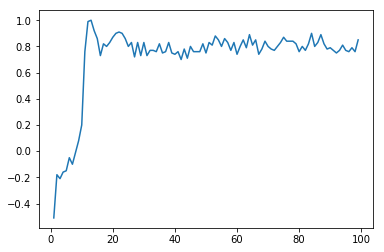

In [27]:
# Learning Process
nIt = 10000
H = 50
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
eps = 0.2  # eps in eps_greedy
temp = 0.2  # temp in soft_policy | higher, actions equally probable [0,2] ??

# Environment
env = FrozenLakeEnv(map_name='8x8', is_slippery=False, reward_dict={'G':1, 'S':-0.00, 'H':-1.00, 'F':0.00})

# Initial q_vals. All zeros
q_vals = np.zeros((env.observation_space.n, env.action_space.n))
rets = np.zeros(nIt)

plot_jump = 100
random.seed(5)  # Set seed for action selection
np.random.seed(5)

# Learning
for itr in range(nIt):
    obs = env.reset()
    done = False
    ret = 0.  # Return
    for t in range(H):
#         action = eps_greedy(q_vals, eps, obs)
        action = softmax_policy(q_vals, obs, temp)
        next_obs, reward, done, info = env.step(action)
        ret += reward
#         print('obs', obs, '| action', action, '| next_obs', next_obs, '| reward', reward, '| return', ret, '| done', done)
        q_learning_update(gamma, alpha, q_vals, obs, action, next_obs, reward)
        obs = next_obs
        rets[itr] = ret
        if done:
            break
    if itr % plot_jump == 0 and itr > 0:
        print('itr', itr, '| avg_ret:', rets[itr-plot_jump:itr].mean())
        
#     if ret > 0:
#         print('it', itr, '| t_end', t, '| ret', ret)

%matplotlib inline
avg_plot = [rets[ii-plot_jump:ii].mean() for ii in range(0, nIt, plot_jump)]
plt.plot(avg_plot)
plt.show()

In [28]:
# Print current q_vals
for q_val in range(q_vals.shape[0]):
    print(q_val, ': ', q_vals[q_val])

0 :  [ 0.229  0.254  0.254  0.229]
1 :  [ 0.229  0.282  0.282  0.254]
2 :  [ 0.254  0.314  0.314  0.282]
3 :  [ 0.282  0.349  0.349  0.314]
4 :  [ 0.314  0.387  0.387  0.349]
5 :  [ 0.349  0.43   0.43   0.387]
6 :  [ 0.387  0.478  0.067  0.255]
7 :  [ 0.209  0.059  0.014  0.019]
8 :  [ 0.254  0.282  0.282  0.229]
9 :  [ 0.254  0.314  0.314  0.254]
10 :  [ 0.282  0.349  0.349  0.282]
11 :  [ 0.314 -0.57   0.387  0.314]
12 :  [ 0.349  0.43   0.43   0.349]
13 :  [ 0.387  0.478  0.478  0.387]
14 :  [ 0.43   0.531  0.085  0.355]
15 :  [ 0.028  0.324  0.04   0.025]
16 :  [ 0.282  0.314  0.314  0.254]
17 :  [ 0.282  0.349  0.349  0.282]
18 :  [ 0.314  0.387 -0.613  0.314]
19 :  [ 0.  0.  0.  0.]
20 :  [-0.469  0.478  0.478  0.387]
21 :  [ 0.43  -0.469  0.531  0.43 ]
22 :  [ 0.478  0.59   0.59   0.478]
23 :  [ 0.122  0.656  0.121  0.043]
24 :  [ 0.314  0.282  0.349  0.282]
25 :  [ 0.314  0.314  0.387  0.314]
26 :  [ 0.349  0.349  0.43   0.349]
27 :  [ 0.387 -0.57   0.478 -0.469]
28 :  [ 0.43  

<IPython.core.display.Javascript object>


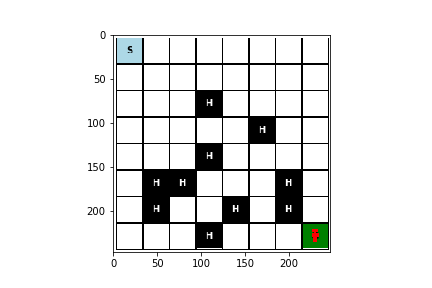

/home/domingo/robotlearning-workspace/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


iter 0 | ob 8 | action 1 | reward 0.0
iter 1 | ob 16 | action 1 | reward 0.0
iter 2 | ob 24 | action 1 | reward 0.0
iter 3 | ob 25 | action 2 | reward 0.0
iter 4 | ob 26 | action 2 | reward 0.0
iter 5 | ob 27 | action 2 | reward 0.0
iter 6 | ob 28 | action 2 | reward 0.0
iter 7 | ob 36 | action 1 | reward 0.0
iter 8 | ob 37 | action 2 | reward 0.0
iter 9 | ob 38 | action 2 | reward 0.0
iter 10 | ob 39 | action 2 | reward 0.0
iter 11 | ob 47 | action 1 | reward 0.0
iter 12 | ob 55 | action 1 | reward 0.0
iter 13 | ob 63 | action 1 | reward 1.0
Finished at t=14 | Acum reward: 1.0


<IPython.core.display.Javascript object>


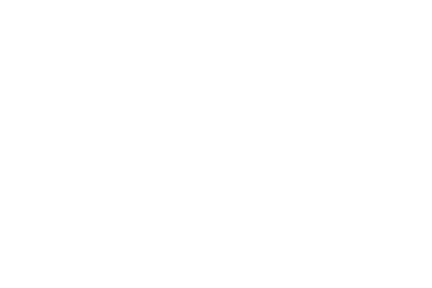

In [30]:
%matplotlib notebook
# Seed RNGs
env.seed(0); from gym.spaces import prng; prng.seed(10)

# Notebook figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Agent from previous VI
agent = Agent(q_vals)

# Generate the episode
ob = env.reset()
render = ax.imshow(env.render(mode='rgb_array'))
ret = 0
H = 20
for t in range(H):
    fig.canvas.set_window_title('Frozen Lake -- Iteration: %02d' % t)
    time.sleep(0.2)
    render.set_data(env.render(mode='rgb_array'))
    fig.canvas.draw()
#     a = env.action_space.sample()
    a = agent.act(ob)
    ob, rew, done, _ = env.step(a)
    ret += rew
    print('iter', t, '| ob',ob,'| action',a,'| reward',rew)
    if done:
        break
assert done
fig.canvas.set_window_title('Frozen Lake -- Iteration: %02d' % t)
time.sleep(0.5)
render.set_data(env.render(mode='rgb_array'))
fig.canvas.draw()
# env.render(close=True)
print('Finished at t=%d'%(t+1),'| Acum reward:', ret)